In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display
import koreanize_matplotlib
import seaborn as sns

In [2]:
origin_train=pd.read_csv("/Users/jeondonghyeon/Downloads/BAF/3주차/train.csv")
origin_test=pd.read_csv("/Users/jeondonghyeon/Downloads/BAF/3주차/test.csv")
data_train=origin_train.copy()
data_test=origin_test.copy()

In [3]:
print(data_train.shape)
data_train

(8040, 14)


,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
print(data_test.shape)
data_test

(720, 13)


,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
716,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
717,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
718,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
data_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# 기상청 데이터를 이용해 결측치 채우기
 * https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
 * https://www.weather.go.kr/w/resources/pdf/kma_data_portal_guide.pdf
 * 일단 이 데이터로 결측치를 채우기 적절한지 판단하기 위해 2가지 정도 생각해볼 수 있다.
   1. 결측치를 제외한 나머지 값들이 모두 동일한가?
   2. 결측치 부분에 적절한 값이 들어가 있는가?
   

# **기온 결측치 채우기**
![설명](이슬점공식.png)

- Dewpoint = 이슬점
- T = 기온
- RH = humidity

In [6]:
data_train.isnull().sum()  # 기온, 풍속, 계절에 결측치 확인

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [7]:
data_test.isnull().sum()  # 기온, 풍속, 계절에 결측치 확인

Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64

In [8]:
# 기상청에서 자료를 가져오기 위해 날짜변수 확인
print(data_train['Date'].head())
print(data_train['Date'].tail())  # train 데이터셋은 2017년 12월 1일부터 2018년 10월 31일까지

0    01/12/2017
1    01/12/2017
2    01/12/2017
3    01/12/2017
4    01/12/2017
Name: Date, dtype: object
8035    31/10/2018
8036    31/10/2018
8037    31/10/2018
8038    31/10/2018
8039    31/10/2018
Name: Date, dtype: object


In [9]:
print(data_test['Date'].head())
print(data_test['Date'].tail())  # test 데이터셋은 2018년 11월 1일부터 2018년 11월 30일까지

0    01/11/2018
1    01/11/2018
2    01/11/2018
3    01/11/2018
4    01/11/2018
Name: Date, dtype: object
715    30/11/2018
716    30/11/2018
717    30/11/2018
718    30/11/2018
719    30/11/2018
Name: Date, dtype: object


In [10]:
data_train[['Date', 'Hour', 'Temperature(째C)', 'Wind speed (m/s)']]

,Date,Hour,Temperature(째C),Wind speed (m/s)
0,01/12/2017,0,-5.2,2.2
1,01/12/2017,1,-5.5,0.8
2,01/12/2017,2,-6.0,1.0
3,01/12/2017,3,-6.2,0.9
4,01/12/2017,4,-6.0,NaN
...,...,...,...,...
8035,31/10/2018,19,8.4,NaN
8036,31/10/2018,20,7.6,0.7
8037,31/10/2018,21,7.6,3.0
8038,31/10/2018,22,6.8,2.2


In [11]:
null_df = pd.read_csv('/Users/jeondonghyeon/Downloads/BAF/3주차/OBS_ASOS_TIM_train.csv', encoding='cp949')  
null_test_df = pd.read_csv('/Users/jeondonghyeon/Downloads/BAF/3주차/OBS_ASOS_TIM_test.csv', encoding='cp949')  # 서울 기온, 풍속 데이터
print(null_df.shape)
print(null_df.columns)
null_df.head()

(8040, 5)
Index(['지점', '지점명', '일시', '기온(°C)', '풍속(m/s)'], dtype='object')


,지점,지점명,일시,기온(°C),풍속(m/s)
0,108,서울,2017-12-01 00:00,-5.2,2.2
1,108,서울,2017-12-01 01:00,-5.5,0.8
2,108,서울,2017-12-01 02:00,-6.0,1.0
3,108,서울,2017-12-01 03:00,-6.2,0.9
4,108,서울,2017-12-01 04:00,-6.0,2.3


In [12]:
null_df.isnull().sum()

지점          0
지점명         0
일시          0
기온(°C)      0
풍속(m/s)    24
dtype: int64

In [13]:
null_test_df.isnull().sum()

지점         0
지점명        0
일시         0
기온(°C)     1
풍속(m/s)    0
dtype: int64

### 기온

#### Train 데이터셋

In [14]:
print(data_train['Temperature(째C)'].isnull().sum())
(data_train['Temperature(째C)'] == null_df['기온(°C)']).value_counts()  # 기온 결측치 800개를 제외한 모든 값이 같다.

800


True     7240
False     800
Name: count, dtype: int64

In [15]:
print(data_train['Temperature(째C)'].head(10))
mask = data_train['Temperature(째C)'].isna()
data_train.loc[mask, 'Temperature(째C)'] = null_df.loc[mask, '기온(°C)']
print(data_train['Temperature(째C)'].head(10))

0   -5.2
1   -5.5
2   -6.0
3   -6.2
4   -6.0
5   -6.4
6    NaN
7   -7.4
8    NaN
9   -6.5
Name: Temperature(째C), dtype: float64
0   -5.2
1   -5.5
2   -6.0
3   -6.2
4   -6.0
5   -6.4
6   -6.6
7   -7.4
8   -7.6
9   -6.5
Name: Temperature(째C), dtype: float64


In [16]:
data_train['Temperature(째C)'].isnull().sum()

np.int64(0)

#### Test 데이터셋

In [17]:
null_test_df['기온(°C)'].isnull().sum()  # 기상청 test 데이터셋에 1개의 결측치

np.int64(1)

In [18]:
print(data_test['Temperature(째C)'].isnull().sum())
(data_test['Temperature(째C)'] == null_test_df['기온(°C)']).value_counts()  # 기온 결측치 76개를 제외한 모든 값이 같다.

76


True     644
False     76
Name: count, dtype: int64

In [19]:
mask = data_test['Temperature(째C)'].isna()
data_test.loc[mask, 'Temperature(째C)'] = null_test_df.loc[mask, '기온(°C)']

data_test['Temperature(째C)'].isnull().sum()

np.int64(1)

In [20]:
# 기상청 데이터로도 채울 수 없는 1개의 결측치는 해당 날짜의 기온의 평균으로 대체
data_test['Temperature(째C)'] = data_test['Temperature(째C)'].fillna(
    data_test.groupby('Date')['Temperature(째C)'].transform('mean')
)

In [21]:
data_test['Temperature(째C)'].isnull().sum()

np.int64(0)

### 풍속

#### train

In [22]:
null_df.isnull().sum()  # 기상청 풍속에 결측치 24개

지점          0
지점명         0
일시          0
기온(°C)      0
풍속(m/s)    24
dtype: int64

In [23]:
data_train['Wind speed (m/s)'].isnull().sum()  # train 데이터셋에 결측치 802개

np.int64(802)

In [24]:
(data_train['Wind speed (m/s)'] == null_df['풍속(m/s)']).value_counts()  # 같지 않은 값 824개 -> 두 데이터셋의 풍속 모두 결측치인 값 2개로 예상

True     7216
False     824
Name: count, dtype: int64

In [25]:
((data_train['Wind speed (m/s)'].isna())&(null_df['풍속(m/s)'].isna())).sum()
# 둘다 결측치인 값 2개 확인 -> train데이터셋을 기상청 데이터로 대체해도 2개의 결측치 남아있을 것으로 예상

np.int64(2)

In [26]:
print(data_train['Wind speed (m/s)'].head(10))
mask = data_train['Wind speed (m/s)'].isna()
data_train.loc[mask, 'Wind speed (m/s)'] = null_df.loc[mask, '풍속(m/s)']
print(data_train['Wind speed (m/s)'].head(10))

0    2.2
1    0.8
2    1.0
3    0.9
4    NaN
5    1.5
6    1.3
7    0.9
8    1.1
9    0.5
Name: Wind speed (m/s), dtype: float64
0    2.2
1    0.8
2    1.0
3    0.9
4    2.3
5    1.5
6    1.3
7    0.9
8    1.1
9    0.5
Name: Wind speed (m/s), dtype: float64


In [27]:
data_train['Wind speed (m/s)'].isnull().sum()  # 2개의 결측치 남아있음 -> 해당 날짜의 풍속 평균으로 채우기

np.int64(2)

In [28]:
data_train.groupby('Date')['Wind speed (m/s)'].transform('mean')

0       1.537500
1       1.537500
2       1.537500
3       1.537500
4       1.537500
          ...   
8035    1.666667
8036    1.666667
8037    1.666667
8038    1.666667
8039    1.666667
Name: Wind speed (m/s), Length: 8040, dtype: float64

In [29]:
data_train['Wind speed (m/s)'] = data_train['Wind speed (m/s)'].fillna(
    data_train.groupby('Date')['Wind speed (m/s)'].transform('mean')
)

In [30]:
data_train['Wind speed (m/s)'].isnull().sum()

np.int64(0)

#### test

In [31]:
null_test_df.isnull().sum()

지점         0
지점명        0
일시         0
기온(°C)     1
풍속(m/s)    0
dtype: int64

In [32]:
data_test['Wind speed (m/s)'].isnull().sum()

np.int64(74)

In [33]:
(data_test['Wind speed (m/s)'] == null_test_df['풍속(m/s)']).value_counts()  # 결측치 제외 모두 일치

True     646
False     74
Name: count, dtype: int64

In [34]:
print(data_test['Wind speed (m/s)'].head(10))
mask = data_test['Wind speed (m/s)'].isna()
data_test.loc[mask, 'Wind speed (m/s)'] = null_test_df.loc[mask, '풍속(m/s)']
print(data_test['Wind speed (m/s)'].head(10))

0    2.3
1    1.6
2    NaN
3    0.7
4    0.8
5    0.0
6    0.2
7    0.5
8    0.9
9    0.9
Name: Wind speed (m/s), dtype: float64
0    2.3
1    1.6
2    1.4
3    0.7
4    0.8
5    0.0
6    0.2
7    0.5
8    0.9
9    0.9
Name: Wind speed (m/s), dtype: float64


In [35]:
data_test['Wind speed (m/s)'].isnull().sum()

np.int64(0)

## 계절 데이터 결측치 채우기

#### train

In [36]:
data_train.isnull().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)                0
Humidity(%)                    0
Wind speed (m/s)               0
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [37]:
data_train['Seasons'].value_counts(dropna=False)

Seasons
Spring    1990
Summer    1990
Winter    1935
Autumn    1323
NaN        802
Name: count, dtype: int64

In [38]:
data_train[['Date', 'Seasons']]

,Date,Seasons
0,01/12/2017,NaN
1,01/12/2017,Winter
2,01/12/2017,Winter
3,01/12/2017,Winter
4,01/12/2017,Winter
...,...,...
8035,31/10/2018,Autumn
8036,31/10/2018,NaN
8037,31/10/2018,Autumn
8038,31/10/2018,Autumn


In [39]:
# 같은 날짜면 같은 계절로 채우기
data_train['Seasons'] = data_train.groupby('Date')['Seasons'].transform(lambda x: x.ffill().bfill())
data_train['Seasons'].isnull().sum()  # No 결측치

np.int64(0)

In [40]:
data_train['Seasons'].value_counts(dropna=False)

Seasons
Spring    2208
Summer    2208
Winter    2160
Autumn    1464
Name: count, dtype: int64

#### test

In [41]:
data_test.isnull().sum()

Date                          0
Hour                          0
Temperature(째C)               0
Humidity(%)                   0
Wind speed (m/s)              0
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64

In [42]:
data_test['Seasons'].value_counts(dropna=False)

Seasons
Autumn    646
NaN        74
Name: count, dtype: int64

In [43]:
# test 데이터셋은 2018년 11월 1일부터 2018년 11월 30일까지 모두 같은 해 같은 달 이므로 같은 Season 처리
data_test['Seasons'] = 'Autumn'

In [44]:
data_test['Seasons'].value_counts(dropna=False)

Seasons
Autumn    720
Name: count, dtype: int64

## 최종 결측치 갯수 확인

In [45]:
print(data_train.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [46]:
print(data_test.isnull().sum())

Date                         0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


## 변수별 EDA

In [47]:
data_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [48]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            8040 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           8040 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    8040 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [49]:
data_train.describe()

,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,709.775995,11.500000,13.337301,58.271020,1.755570,1459.170896,4.522239,0.587072,0.152164,0.066493
std,657.320605,6.922617,12.292018,20.340492,1.046382,603.716284,13.393517,0.886186,1.127026,0.378182
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.200000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000
50%,485.000000,11.500000,15.350000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000
75%,1080.500000,17.250000,23.200000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [50]:
data_train.describe(include='object')

,Date,Seasons,Holiday,Functioning Day
count,8040,8040,8040,8040
unique,335,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,7608,7817


#### Rented Bike Count (목표변수)

In [51]:
data_train['Rented Bike Count'].describe()

count    8040.000000
mean      709.775995
std       657.320605
min         0.000000
25%       191.000000
50%       485.000000
75%      1080.500000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [52]:
data_train['Rented Bike Count'].isnull().sum()

np.int64(0)

<Axes: >

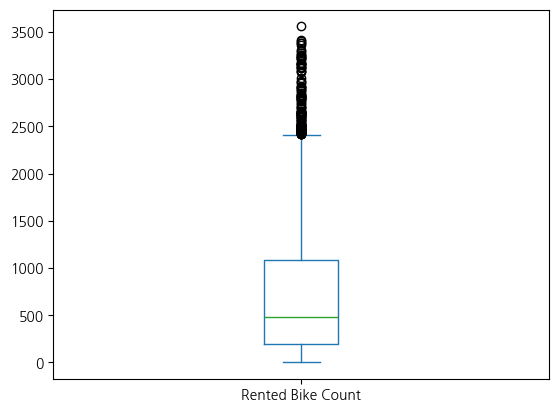

In [53]:
data_train['Rented Bike Count'].plot.box()

<Axes: xlabel='Rented Bike Count'>

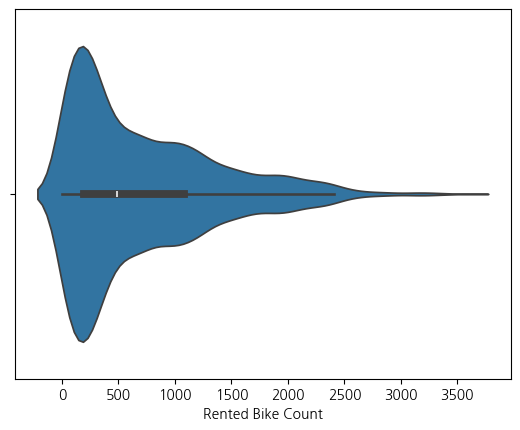

In [54]:
sns.violinplot(data=data_train, x='Rented Bike Count')

* 대여 따릉이 수는 Right-skewed 된 형태를 띄고 있으며 최소값은 0, 최대값은 3556이다.

#### Date

In [55]:
data_train['Date']

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8035    31/10/2018
8036    31/10/2018
8037    31/10/2018
8038    31/10/2018
8039    31/10/2018
Name: Date, Length: 8040, dtype: object

* 2017년 12월 1일부터 2018년 10월 31일까지의 데이터이다.

#### Hour

In [56]:
data_train['Hour']

0        0
1        1
2        2
3        3
4        4
        ..
8035    19
8036    20
8037    21
8038    22
8039    23
Name: Hour, Length: 8040, dtype: int64

In [57]:
data_train['Hour'].value_counts() 

Hour
0     335
1     335
22    335
21    335
20    335
19    335
18    335
17    335
16    335
15    335
14    335
13    335
12    335
11    335
10    335
9     335
8     335
7     335
6     335
5     335
4     335
3     335
2     335
23    335
Name: count, dtype: int64

In [58]:
data_train['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [59]:
data_train['Hour'].isnull().sum()

np.int64(0)

* Hour데이터는 0시부터 23시가지 있으며 결측치는 없다.

#### Temperature(째C)

In [60]:
data_train['Temperature(째C)'].describe()

count    8040.000000
mean       13.337301
std        12.292018
min       -17.800000
25%         3.200000
50%        15.350000
75%        23.200000
max        39.400000
Name: Temperature(째C), dtype: float64

In [61]:
data_train['Temperature(째C)'].isnull().sum()

np.int64(0)

<Axes: xlabel='Temperature(째C)'>

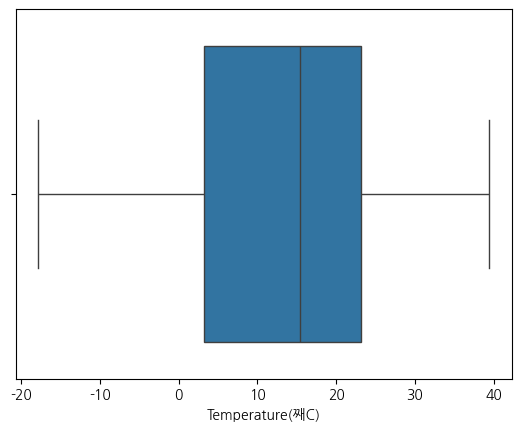

In [62]:
sns.boxplot(data=data_train, x='Temperature(째C)')

<Axes: xlabel='Temperature(째C)'>

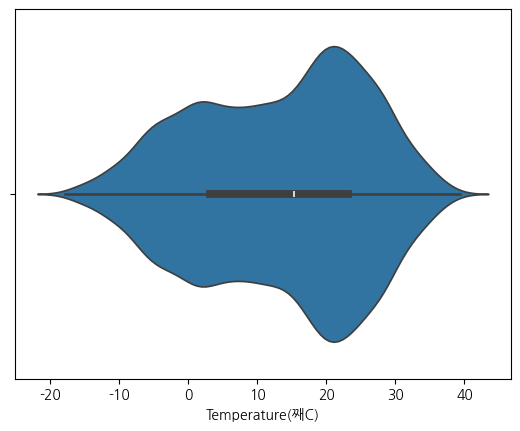

In [63]:
sns.violinplot(data=data_train, x='Temperature(째C)')

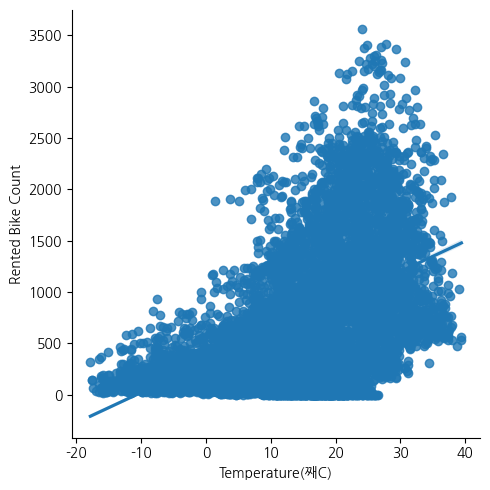

In [64]:
sns.lmplot(data=data_train, x='Temperature(째C)', y='Rented Bike Count')

In [65]:
# 이슬점 온도 공식 적용 및 비교
T = data_train['Temperature(째C)']
RH = data_train['Humidity(%)']
TT = np.log(RH / 100.0) + (17.62 * T) / (243.12 + T)
Cal_Dew = (243.12 * TT) / (17.62 - TT)

compare = data_train[['Dew point temperature(째C)']].copy()
compare['Calcurated_Dew point'] = Cal_Dew
print(compare.head(30))

    Dew point temperature(째C)  Calcurated_Dew point
0                       -17.6            -17.650553
1                       -17.6            -17.603829
2                       -17.7            -17.746663
3                       -17.6            -17.627232
4                       -18.6            -18.691758
5                       -18.7            -18.728530
6                       -19.5            -19.558480
7                       -19.3            -19.315893
8                       -19.8            -19.807076
9                       -22.4            -22.458828
10                      -21.2            -21.214312
11                      -20.2            -20.203656
12                      -17.2            -17.269785
13                      -15.6            -15.671678
14                      -14.6            -14.680058
15                      -11.4            -11.448894
16                       -7.0             -7.094741
17                       -6.5             -6.538063
18          

/opt/anaconda3/envs/ds/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
data_train['Temperature_high'] = data_train['Temperature(째C)'] > 0 
data_train['Temperature_high'] = data_train['Temperature_high'].astype(int)
print(data_train[['Temperature(째C)', 'Temperature_high']].head(20))

data_test['Temperature_high'] = data_test['Temperature(째C)'] > 0 
data_test['Temperature_high'] = data_test['Temperature_high'].astype(int)
print(data_test[['Temperature(째C)', 'Temperature_high']].head(20))

    Temperature(째C)  Temperature_high
0              -5.2                 0
1              -5.5                 0
2              -6.0                 0
3              -6.2                 0
4              -6.0                 0
5              -6.4                 0
6              -6.6                 0
7              -7.4                 0
8              -7.6                 0
9              -6.5                 0
10             -3.5                 0
11             -0.5                 0
12              1.7                 1
13              2.4                 1
14              3.0                 1
15              2.1                 1
16              1.2                 1
17              0.8                 1
18              0.6                 1
19              0.0                 0
    Temperature(째C)  Temperature_high
0               5.7                 1
1               5.1                 1
2               4.4                 1
3               4.2                 1
4           

* 기온 변수는 결측치가 없으며 최소 -17.8, 최대 39.4이고 봉우리가 두개 있는 분포를 띄고 있다.
* 기온이 영하일 때 거의 모든 데이터의 대여량이 1000보다 낮은 것을 확인했다. 따라서 기온이 낮고 높음에 따른 범주형 파생변수를 추가했다.

#### Humidity(%)

In [67]:
data_train['Humidity(%)'].describe()

count    8040.000000
mean       58.271020
std        20.340492
min         0.000000
25%        43.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity(%), dtype: float64

In [68]:
data_train['Humidity(%)'].isnull().sum()

np.int64(0)

<Axes: xlabel='Humidity(%)'>

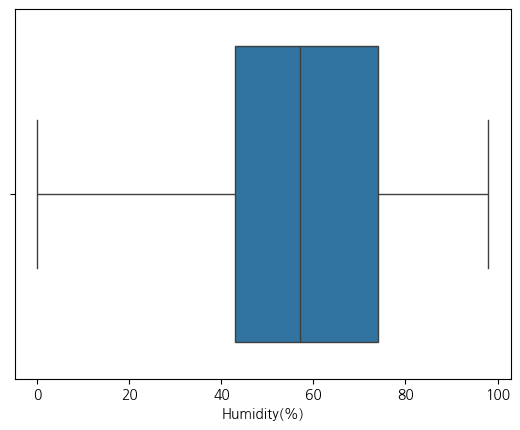

In [69]:
sns.boxplot(data=data_train, x='Humidity(%)')

<Axes: xlabel='Humidity(%)'>

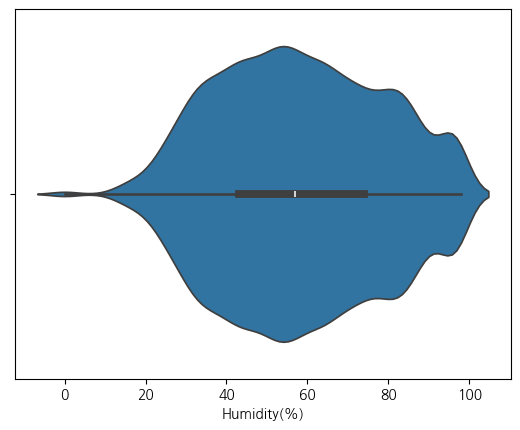

In [70]:
sns.violinplot(data=data_train, x='Humidity(%)')

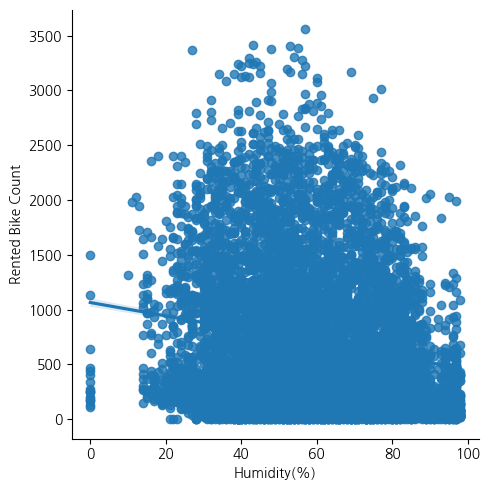

In [71]:
sns.lmplot(data=data_train, x='Humidity(%)', y='Rented Bike Count')

* 습도 변수는 결측치가 없으며 최소 0, 최대 98이고 비교적 정규적인 분포를 띄고 있다.
* 습도와 자전거 대여량은 약한 음의 상관관계를 가지고 있다.

#### Wind speed (m/s) 

In [72]:
data_train['Wind speed (m/s)'].describe()

count    8040.000000
mean        1.755570
std         1.046382
min         0.000000
25%         1.000000
50%         1.600000
75%         2.400000
max         7.400000
Name: Wind speed (m/s), dtype: float64

In [73]:
data_train['Wind speed (m/s)'].isnull().sum()

np.int64(0)

<Axes: xlabel='Wind speed (m/s)'>

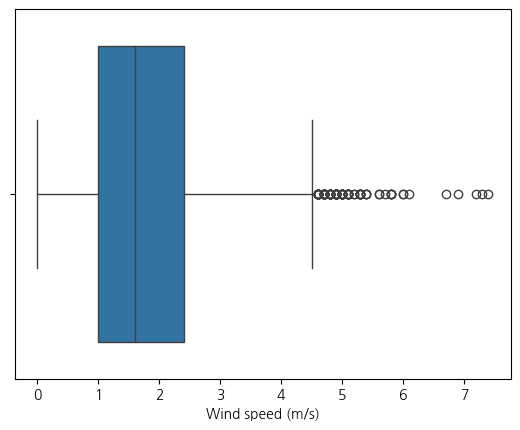

In [74]:
sns.boxplot(data=data_train, x='Wind speed (m/s)')

<Axes: xlabel='Wind speed (m/s)'>

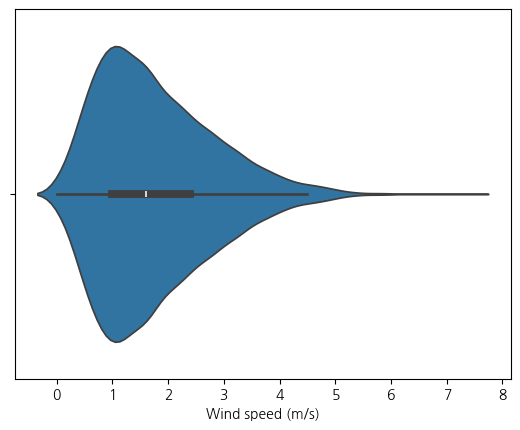

In [75]:
sns.violinplot(data=data_train, x='Wind speed (m/s)')

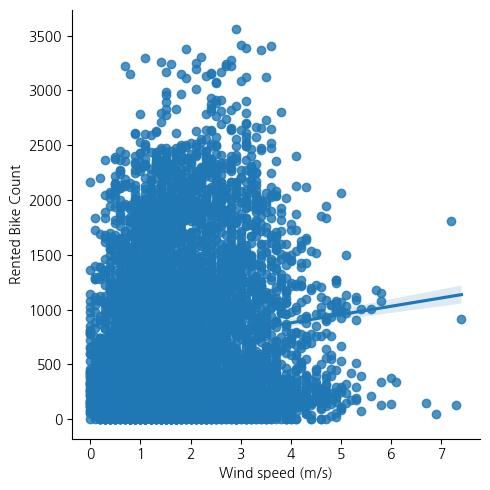

In [76]:
sns.lmplot(data=data_train, x='Wind speed (m/s)', y='Rented Bike Count')

* 풍속 변수는 결측치가 없으며 최소 0, 최대 7.4이고 Right-Skewed된 분포를 띄고 있다. 값이 큰 쪽에 이상치가 있다.
* 풍속과 자전거 대여량은 약한 양의 상관관계에 있다.

#### Visibility (10m) 

In [77]:
data_train['Visibility (10m)'].describe()

count    8040.000000
mean     1459.170896
std       603.716284
min        27.000000
25%       977.000000
50%      1741.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

In [78]:
data_train['Visibility (10m)'].isnull().sum()

np.int64(0)

<Axes: xlabel='Visibility (10m)'>

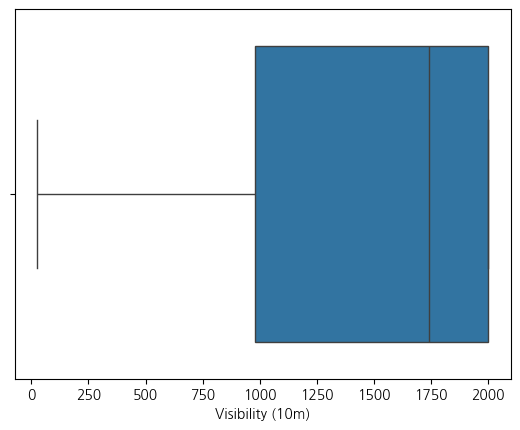

In [79]:
sns.boxplot(data=data_train, x='Visibility (10m)')

<Axes: xlabel='Visibility (10m)'>

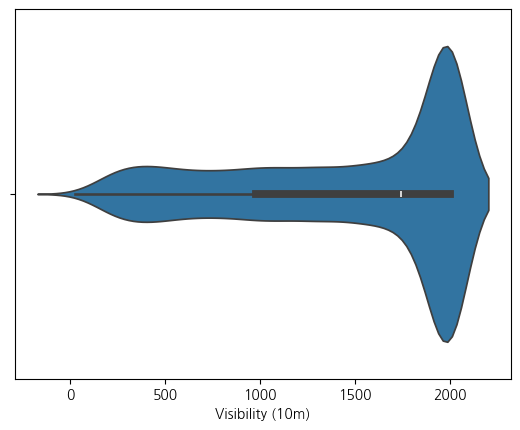

In [80]:
sns.violinplot(data=data_train, x='Visibility (10m)')

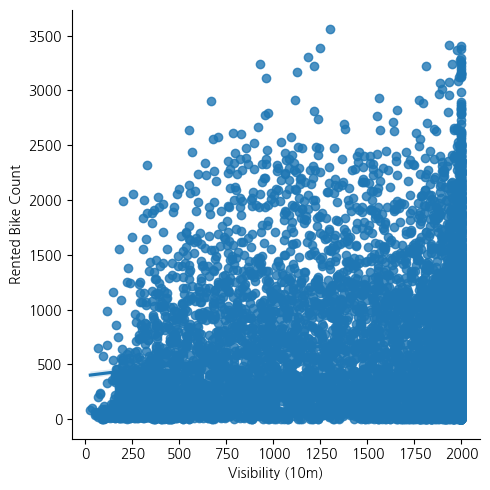

In [81]:
sns.lmplot(data=data_train, x='Visibility (10m)', y='Rented Bike Count')

* 가시거리 변수는 결측치가 없으며 최소 27, 최대 2000이고 Left-Skewed된 분포를 띄고 있다. 값이 대부분 최대값 큰처에 있는 것을 확인했다.
* 가시거리의 25%가 최대치이므로 관측치의 최대가 정해진 경우라고 예상한다.

#### Dew point temperature(째C)

In [82]:
data_train['Dew point temperature(째C)'].describe()

count    8040.000000
mean        4.522239
std        13.393517
min       -30.600000
25%        -4.600000
50%         6.400000
75%        15.600000
max        27.200000
Name: Dew point temperature(째C), dtype: float64

In [83]:
data_train['Dew point temperature(째C)'].isnull().sum()

np.int64(0)

<Axes: xlabel='Dew point temperature(째C)'>

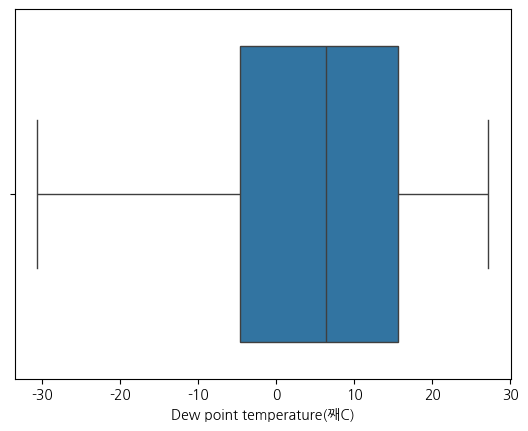

In [84]:
sns.boxplot(data=data_train, x='Dew point temperature(째C)')

<Axes: xlabel='Dew point temperature(째C)'>

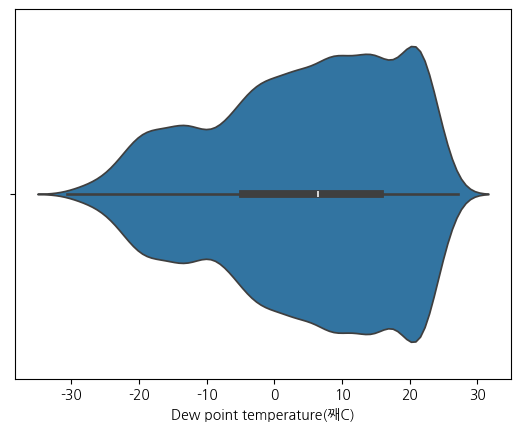

In [85]:
sns.violinplot(data=data_train, x='Dew point temperature(째C)')

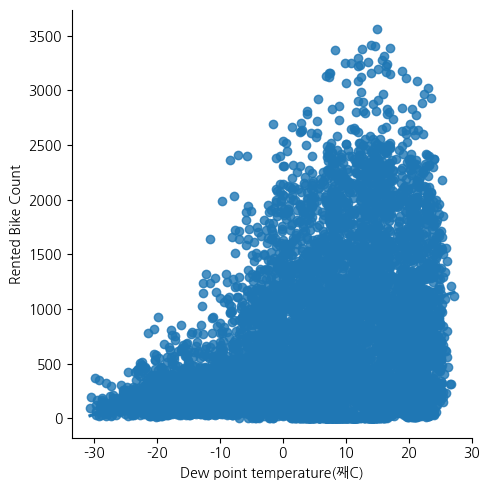

In [86]:
sns.lmplot(data=data_train, x='Dew point temperature(째C)', y='Rented Bike Count')

* 이슬점 변수는 결측치가 없으며 최소 -30.6, 최대 27.2이다.
* 이슬점 온도가 높을수록 자전거 대여량이 많아지는 것을 확인했다.

#### Solar Radiation (MJ/m2)

In [87]:
data_train['Solar Radiation (MJ/m2)'].describe()

count    8040.000000
mean        0.587072
std         0.886186
min         0.000000
25%         0.000000
50%         0.020000
75%         0.960000
max         3.520000
Name: Solar Radiation (MJ/m2), dtype: float64

In [88]:
data_train['Solar Radiation (MJ/m2)'].isnull().sum()

np.int64(0)

<Axes: xlabel='Solar Radiation (MJ/m2)'>

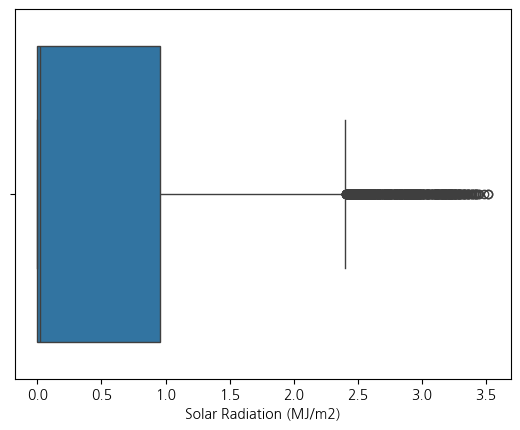

In [89]:
sns.boxplot(data=data_train, x='Solar Radiation (MJ/m2)')

<Axes: xlabel='Solar Radiation (MJ/m2)'>

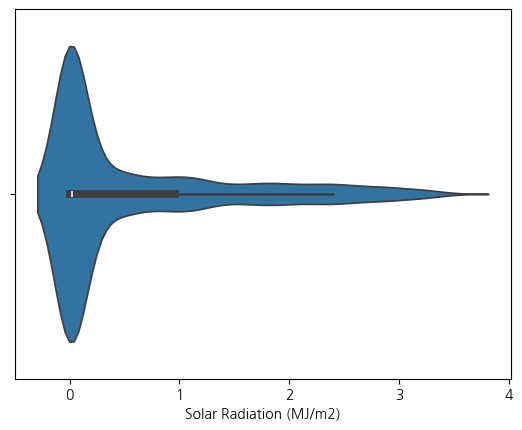

In [90]:
sns.violinplot(data=data_train, x='Solar Radiation (MJ/m2)')

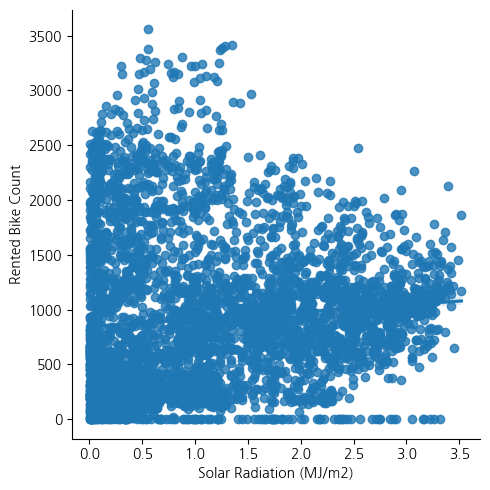

In [91]:
sns.lmplot(data=data_train[data_train['Solar Radiation (MJ/m2)'] > 0] , x='Solar Radiation (MJ/m2)', y='Rented Bike Count')

* 일사량 변수는 결측치가 없으며 최소 0, 최대 3.52이고 Right-Skewed된 분포를 띄고 있다. 적어도 데이터의 25%의 일사량이 0이다.

#### Rainfall(mm)

In [92]:
data_train['Rainfall(mm)'].describe()

count    8040.000000
mean        0.152164
std         1.127026
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

In [93]:
data_train['Rainfall(mm)'].isnull().sum()

np.int64(0)

<Axes: xlabel='Rainfall(mm)'>

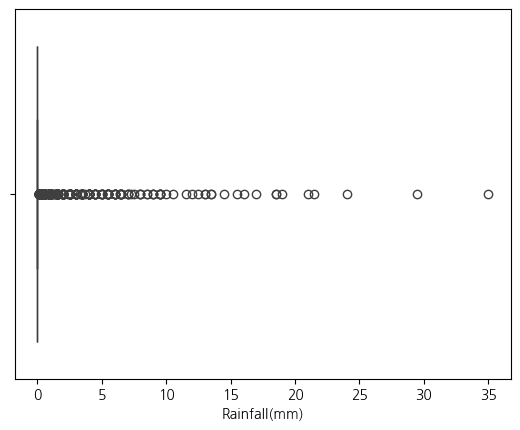

In [94]:
sns.boxplot(data=data_train, x='Rainfall(mm)')

<Axes: xlabel='Rainfall(mm)'>

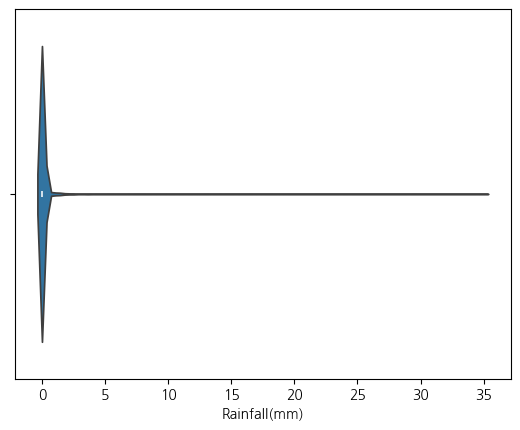

In [95]:
sns.violinplot(data=data_train, x='Rainfall(mm)')

<Axes: xlabel='Rainfall(mm)'>

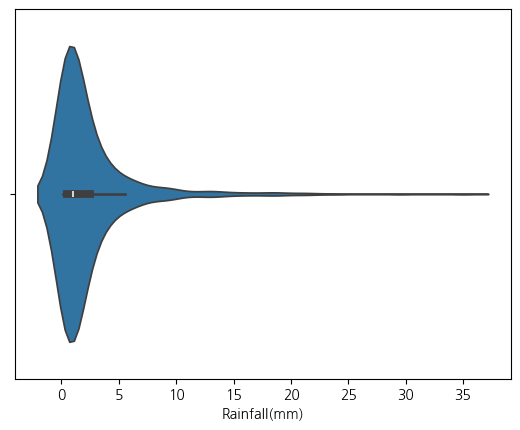

In [96]:
sns.violinplot(data=data_train[data_train['Rainfall(mm)']>0], x='Rainfall(mm)')

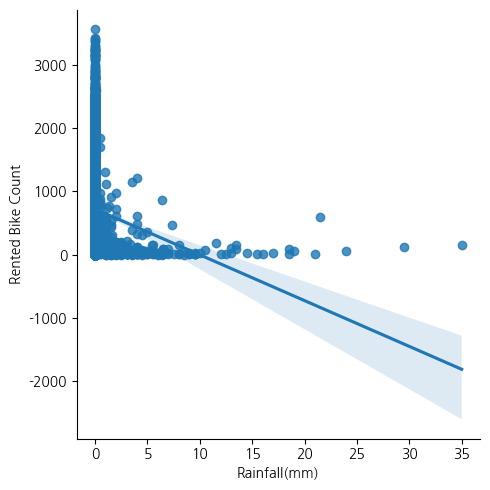

In [97]:
sns.lmplot(data=data_train, x='Rainfall(mm)', y='Rented Bike Count')

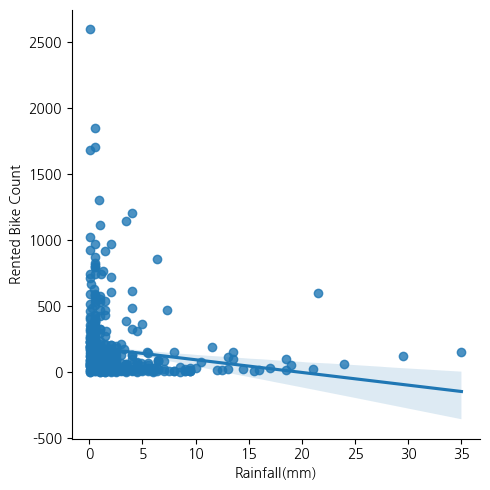

In [98]:
sns.lmplot(data=data_train[data_train['Rainfall(mm)']>0], x='Rainfall(mm)', y='Rented Bike Count')

* 강수량 변수는 결측치가 없으며 최소 0, 최대 35mm이고 적어도 75%의 데이터의 강수량이 0인 것을 확인할 수 있다. IQR이 0이고 Q3가 0이므로 강수량이 0 이 아닌 데이터는 모두 박스플랏에서 결측치로 나온 것을 확인 할 수 있다.
* 강수량이 0 초과인 데이터의 분포는 Right-Skewed된 것을 확인할 수 있다.

#### Snowfall (cm)

In [99]:
data_train['Snowfall (cm)'].describe()

count    8040.000000
mean        0.066493
std         0.378182
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.100000
Name: Snowfall (cm), dtype: float64

In [100]:
data_train['Snowfall (cm)'].isnull().sum()

np.int64(0)

<Axes: xlabel='Snowfall (cm)'>

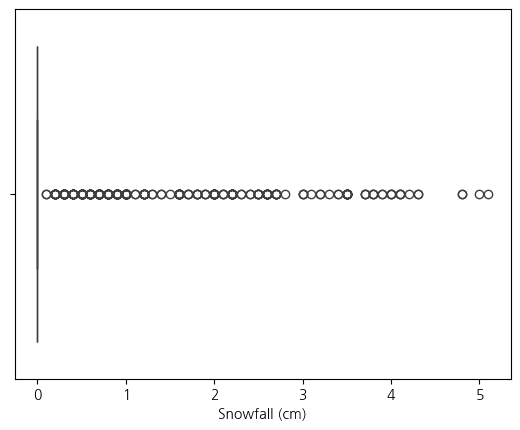

In [101]:
sns.boxplot(data=data_train, x='Snowfall (cm)')

<Axes: xlabel='Snowfall (cm)'>

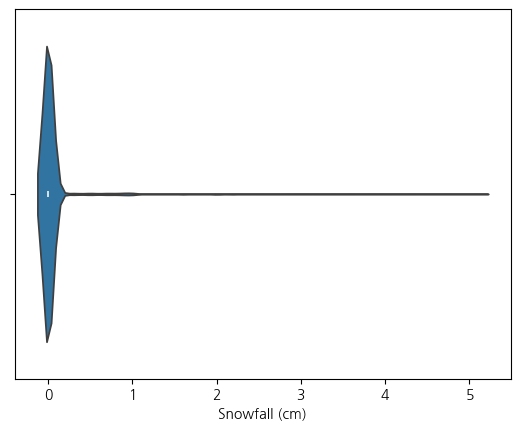

In [102]:
sns.violinplot(data=data_train, x='Snowfall (cm)')

<Axes: xlabel='Snowfall (cm)'>

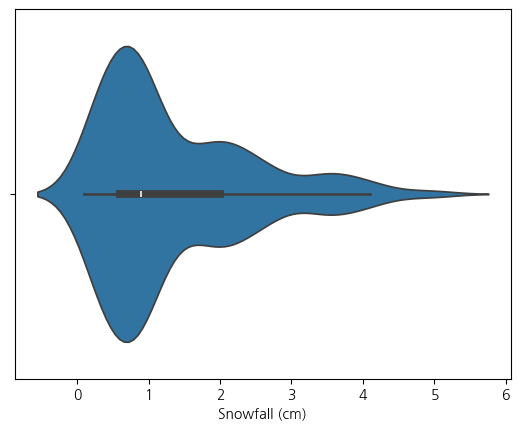

In [103]:
sns.violinplot(data=data_train[data_train['Snowfall (cm)']>0], x='Snowfall (cm)')

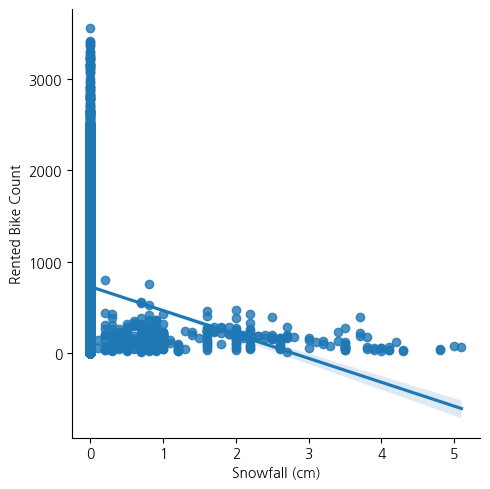

In [104]:
sns.lmplot(data=data_train, x='Snowfall (cm)', y='Rented Bike Count')

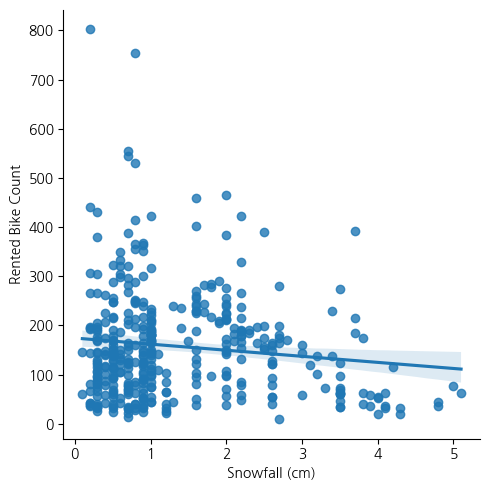

In [105]:
sns.lmplot(data=data_train[data_train['Snowfall (cm)']>0], x='Snowfall (cm)', y='Rented Bike Count')

* 적설량 변수는 결측치가 없으며 최소 0, 최대 5.1cm이고 적어도 75%의 데이터의 적설량이 0인 것을 확인할 수 있다. IQR이 0이고 Q3가 0이므로 적설량이 0 이 아닌 데이터는 모두 박스플랏에서 결측치로 나온 것을 확인 할 수 있다.
* 적설량이 0 초과인 데이터의 분포는 Right-Skewed된 것을 확인할 수 있다.

#### Seasons 

In [106]:
data_train['Seasons'].value_counts(dropna=False)

Seasons
Spring    2208
Summer    2208
Winter    2160
Autumn    1464
Name: count, dtype: int64

In [107]:
# 더미변수 만들기
data_train['Spring'] = (data_train['Seasons']=='Spring').astype(int)
data_train['Summer'] = (data_train['Seasons']=='Summer').astype(int)
data_train['Autumn'] = (data_train['Seasons']=='Autumn').astype(int)

data_test['Spring'] = (data_test['Seasons']=='Spring').astype(int)
data_test['Summer'] = (data_test['Seasons']=='Summer').astype(int)
data_test['Autumn'] = (data_test['Seasons']=='Autumn').astype(int)

data_train[['Seasons', 'Spring', 'Summer', 'Autumn']]

,Seasons,Spring,Summer,Autumn
0,Winter,0,0,0
1,Winter,0,0,0
2,Winter,0,0,0
3,Winter,0,0,0
4,Winter,0,0,0
...,...,...,...,...
8035,Autumn,0,0,1
8036,Autumn,0,0,1
8037,Autumn,0,0,1
8038,Autumn,0,0,1


* 계절 변수를 보면 봄, 여름, 가을, 겨울은 각각 2208개, 2208개, 2160개, 1464개 있으며 결측치는 없다.
* 계절이 4개이므로 더미변수 3개를 만들었다.

#### Holiday

In [108]:
data_train['Holiday'].value_counts(dropna=False)

Holiday
No Holiday    7608
Holiday        432
Name: count, dtype: int64

In [109]:
data_train.groupby('Holiday')['Rented Bike Count'].mean()

Holiday
Holiday       499.756944
No Holiday    721.701367
Name: Rented Bike Count, dtype: float64

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

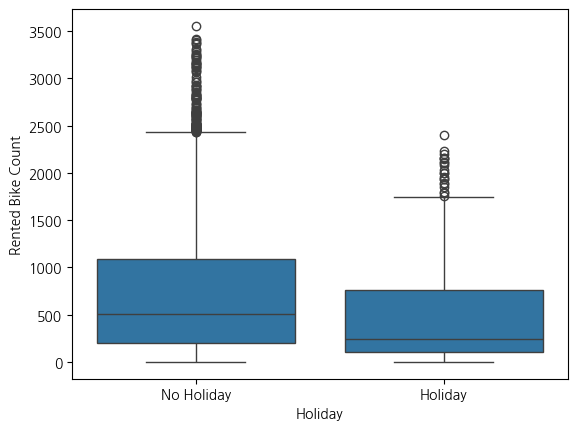

In [110]:
sns.boxplot(data=data_train, x='Holiday', y='Rented Bike Count')

In [111]:
data_train['New_Holiday'] = data_train['Holiday'] == 'Holiday'
data_train['New_Holiday'] = data_train['New_Holiday'].astype(int)

data_test['New_Holiday'] = data_test['Holiday'] == 'Holiday'
data_test['New_Holiday'] = data_test['New_Holiday'].astype(int)

* 휴일 여부 변수는 범주형 변수이며 종속변수인 대여 자전거 수를 범주별로 나누어 확인했다. 휴일이 아닌 경우 바이크 대여량의 평균, 중위수가 더 높고 각 사분위 수가 더 높으며 전체 범위 또한 더 높게 분포해 있다. 따라서 휴일이 아닌 경우에 자전거 대여량이 더 높다고 말할 수 있다.
* 휴일 여부에 따른 정수형 파생변수를 새로 만들었다.

#### Functioning Day

In [112]:
data_train['Functioning Day'].value_counts(dropna=False)

Functioning Day
Yes    7817
No      223
Name: count, dtype: int64

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

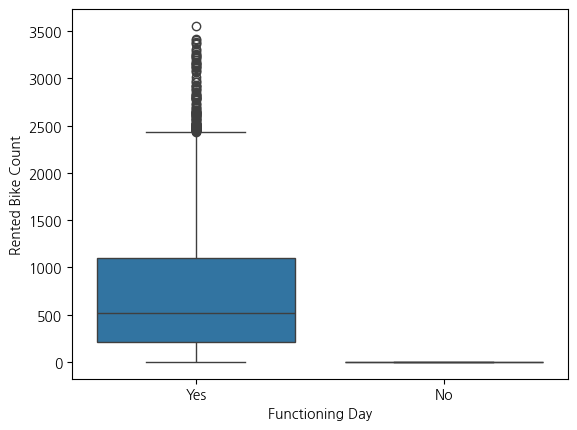

In [113]:
sns.boxplot(data=data_train, x='Functioning Day', y='Rented Bike Count')

In [114]:
data_train.loc[data_train['Functioning Day']=='No', 'Rented Bike Count'].value_counts()

Rented Bike Count
0    223
Name: count, dtype: int64

In [115]:
data_train['New_Fuctioning Day'] = (data_train['Functioning Day'] == 'Yes').astype(int)
data_test['New_Fuctioning Day'] = (data_test['Functioning Day'] == 'Yes').astype(int)
data_train[['Functioning Day', 'New_Fuctioning Day']].head()

,Functioning Day,New_Fuctioning Day
0,Yes,1
1,Yes,1
2,Yes,1
3,Yes,1
4,Yes,1


* 운영일 여부 데이터의 오차를 확인하기 위해 운영을 하지 않을 때의 자전거 대여량을 확인했고 모두 0인 것을 확인했다.

## 데이터셋 정리

In [116]:
data_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Temperature_high', 'Spring', 'Summer',
       'Autumn', 'New_Holiday', 'New_Fuctioning Day'],
      dtype='object')

## 상관분석

In [117]:
cor_df = data_train.loc[data_train['Functioning Day'] == 'Yes'  , ['Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'New_Holiday']]
cor_df.head()

,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),New_Holiday
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0


<Axes: >

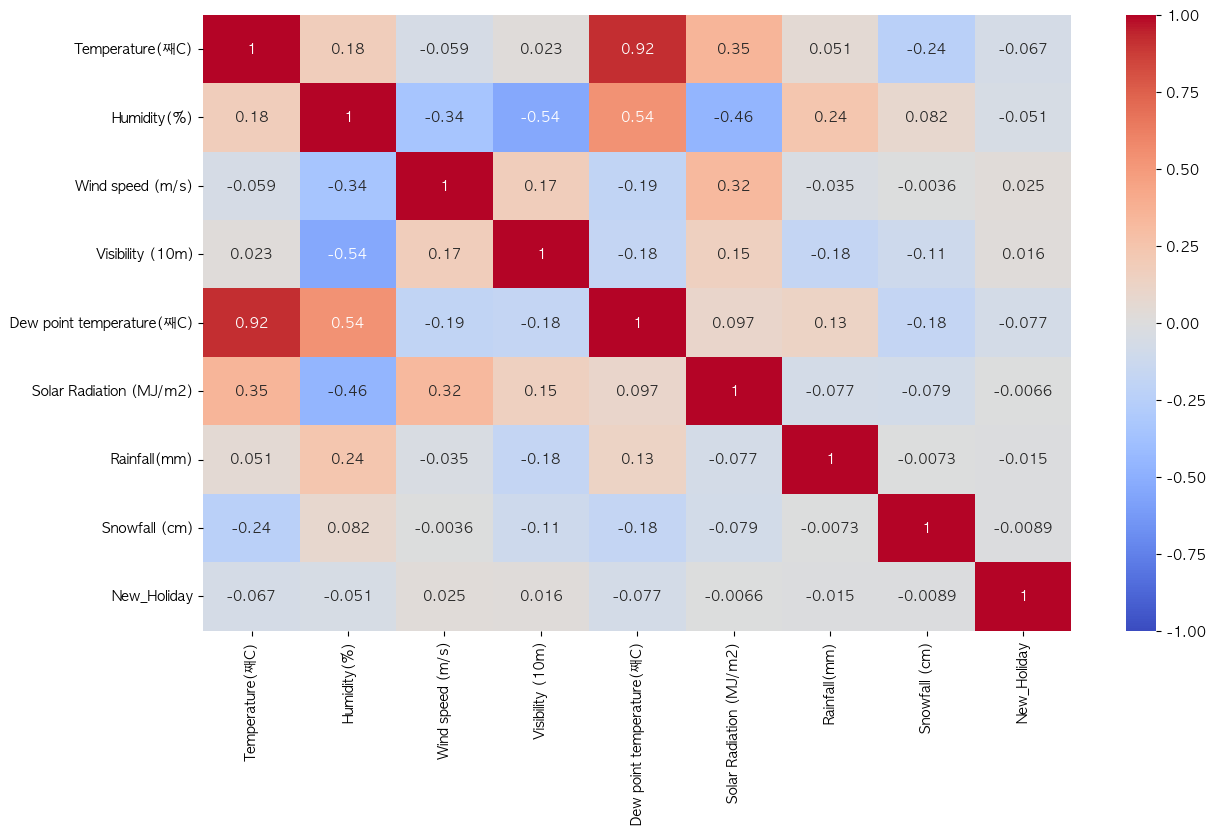

In [118]:
plt.rc('font',family='AppleGothic')
plt.figure(figsize=(14,8))
sns.heatmap(cor_df.corr(), annot=True, vmax=1, vmin=-1, cmap='coolwarm')

* 기온과 이슬점 온도는 높은 양의 상관관계에 있고 습도 또한 이슬점 온도와 양의 상관관계에 있다.
* 습도와 가시거리, 습도와 일사량는 음의 상관관계에 있다.

# 모델링

## 데이터셋 나누기

In [119]:
data_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Temperature_high', 'Spring', 'Summer',
       'Autumn', 'New_Holiday', 'New_Fuctioning Day'],
      dtype='object')

In [120]:
data_test.columns

Index(['Date', 'Hour', 'Temperature(째C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Temperature_high', 'Spring', 'Summer',
       'Autumn', 'New_Holiday', 'New_Fuctioning Day'],
      dtype='object')

In [121]:
from sklearn.model_selection import train_test_split

feature_names = ['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                 'Dew point temperature(째C)', 'Solar Radiation (MJ/m2)',
                 'Rainfall(mm)', 'Snowfall (cm)', 'Temperature_high',
                 'New_Holiday', 'Spring', 'Summer', 'Autumn', 'New_Fuctioning Day']

X = data_train[feature_names]
y = data_train['Rented Bike Count']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [122]:
# 그라디언트부스팅 회귀모델 가져오기
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=1234)
model

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

## 그래디언트 부스팅 모델을 사용한 이유
* 오차를 단계적으로 줄이며 성능이 잘나오게 개선하는 부스팅 기법 사용 모델이기 때문
* 하이퍼 파라미터를 이용한 그리드서치나 랜덤서치 사용하여 과적합 조절 가능
* 디시전트리나 랜덤포레스트보다 예측이 더 정교해짐

In [123]:
model.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

## 모델 성능 확인하기

In [124]:
from sklearn.metrics import r2_score

pred_valid = model.predict(X_valid)
rmse = np.sqrt(((y_valid - pred_valid)**2).mean())
mae = abs(y_valid - pred_valid).mean()
r2 = r2_score(y_valid, pred_valid)

print(rmse, mae, r2)

390.10574873376044 275.6911448203192 0.6470842919848528


## Test 데이터 이용해서 따릉이 대여량 예측하기

In [125]:
X_test = data_test[feature_names].copy()
X_test.head()

,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Temperature_high,New_Holiday,Spring,Summer,Autumn,New_Fuctioning Day
0,62,2.3,1909,-1.0,0.0,0.0,0.0,1,0,0,0,1,1
1,65,1.6,1932,-0.9,0.0,0.0,0.0,1,0,0,0,1,1
2,64,1.4,2000,-1.8,0.0,0.0,0.0,1,0,0,0,1,1
3,65,0.7,1962,-1.8,0.0,0.0,0.0,1,0,0,0,1,1
4,70,0.8,1934,-1.3,0.0,0.0,0.0,1,0,0,0,1,1


In [126]:
y_test = model.predict(X_test)

mask = data_test['New_Fuctioning Day'].eq(0) # 운영하지 않는 날은 0으로 처리
y_test[mask.to_numpy()] = 0

print(X_test.shape, y_test.shape)
y_test[:10]

(720, 13) (720,)


array([557.07090993, 523.29834942, 461.75567628, 448.77901592,
       441.31504305, 434.79874225, 469.54687449, 394.13160365,
       801.08781954, 796.12354399])

In [127]:
data_test['Rented Bike Count'] = y_test

In [128]:
data_test.head()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Temperature_high,Spring,Summer,Autumn,New_Holiday,New_Fuctioning Day,Rented Bike Count
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,0,0,1,0,1,557.070910
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,0,0,1,0,1,523.298349
2,01/11/2018,2,4.4,64,1.4,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,0,0,1,0,1,461.755676
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,0,0,1,0,1,448.779016
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,0,0,1,0,1,441.315043


In [129]:
data_test.to_csv('/Users/jeondonghyeon/Documents/BAF/BAF-Fresh-Edu-18/Predict_RentedBike.csv', index=False)